<a href="https://colab.research.google.com/github/ohalete/MSc_Project/blob/main/PROJECT_CODE_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import And Pre-Processing

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier

In [ ]:
# Load the PIMA csv file
Pima_dataset = pd.read_csv('PIMA.csv')

In [ ]:
# View the first 10 records of PIMA dataset
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Check details of the PIMA dataset, the Dimension of the dataset
Pima_dataset.shape

(768, 9)

In [ ]:
# Check details of all the Attributes
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for NULL Values
Pima_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print("NUMBER OF ROWS HAVING 0 GLUCOSE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("NUMBER OF ROWS HAVING 0 BLOOD PRESSURE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("NUMBER OF ROWS HAVING 0 SKIN THICKNESS VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("NUMBER OF ROWS HAVING 0 INSULIN VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("NUMBER OF ROWS HAVING 0 BMI VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("NUMBER OF ROWS HAVING 0 DIABETES PEDIGREE FUNCTION VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("NUMBER OF ROWS HAVING 0 AGE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))

NUMBER OF ROWS HAVING 0 GLUCOSE VALUE: 5
NUMBER OF ROWS HAVING 0 BLOOD PRESSURE VALUE: 35
NUMBER OF ROWS HAVING 0 SKIN THICKNESS VALUE: 227
NUMBER OF ROWS HAVING 0 INSULIN VALUE: 374
NUMBER OF ROWS HAVING 0 BMI VALUE: 11
NUMBER OF ROWS HAVING 0 DIABETES PEDIGREE FUNCTION VALUE: 0
NUMBER OF ROWS HAVING 0 AGE VALUE: 0


In [ ]:
# Replace Missing Values with mean values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset [['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [ ]:
print("NUMBER OF ROWS HAVING 0 GLUCOSE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("NUMBER OF ROWS HAVING 0 BLOOD PRESSURE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("NUMBER OF ROWS HAVING 0 SKIN THICKNESS VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("NUMBER OF ROWS HAVING 0 INSULIN VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("NUMBER OF ROWS HAVING 0 BMI VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("NUMBER OF ROWS HAVING 0 DIABETES PEDIGREE FUNCTION VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("NUMBER OF ROWS HAVING 0 AGE VALUE: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))

NUMBER OF ROWS HAVING 0 GLUCOSE VALUE: 0
NUMBER OF ROWS HAVING 0 BLOOD PRESSURE VALUE: 0
NUMBER OF ROWS HAVING 0 SKIN THICKNESS VALUE: 0
NUMBER OF ROWS HAVING 0 INSULIN VALUE: 0
NUMBER OF ROWS HAVING 0 BMI VALUE: 0
NUMBER OF ROWS HAVING 0 DIABETES PEDIGREE FUNCTION VALUE: 0
NUMBER OF ROWS HAVING 0 AGE VALUE: 0


In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [ ]:
Pima_dataset.shape

(768, 9)

In [ ]:
# Number of Outcomes that are positive and negative
Pima_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Split the Data (Train Test Split)

X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [ ]:
X_smote, X_test, y_smote, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables.
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info = mutual_info_classif(X_smote, y_smote, random_state = 0)
mutual_info

array([0.01555395, 0.11796705, 0.01509219, 0.01035643, 0.02548305,
       0.07923143, 0.        , 0.04601336])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_smote.columns
mutual_info.sort_values(ascending = False)


Glucose                     0.117967
BMI                         0.079231
Age                         0.046013
Insulin                     0.025483
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010356
DiabetesPedigreeFunction    0.000000
dtype: float64

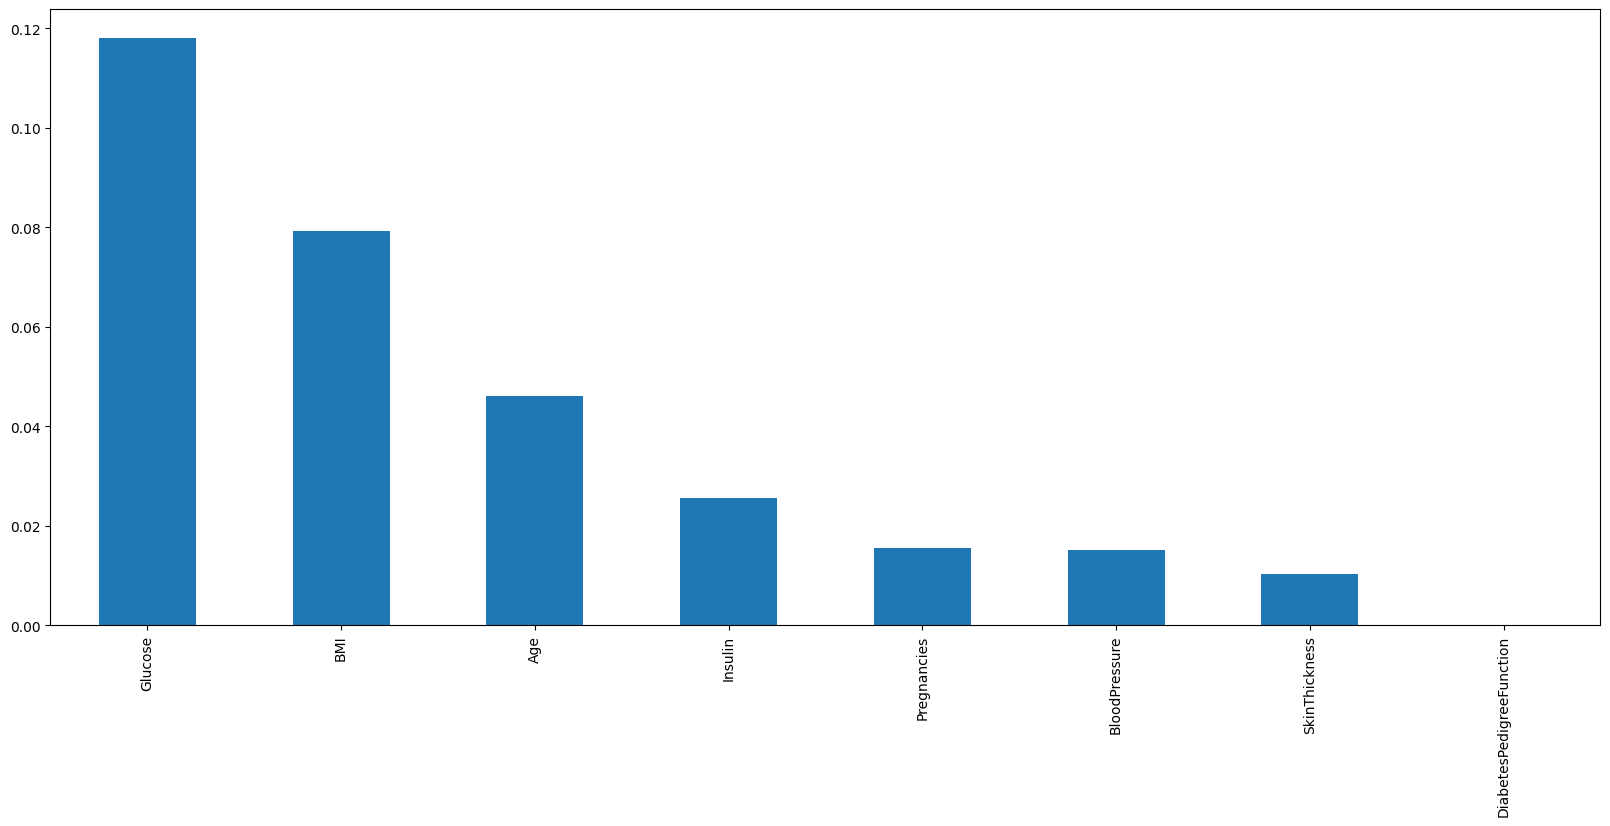

In [ ]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [ ]:
#So we decided to drp the DiabetesPedigreeFunction column
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,54,1


In [ ]:
Pima_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,47,1


In [ ]:
Pima_dataset.to_csv('PIMA_projectdata_full.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
# Predict Insulin column in RTML DATA

In [ ]:
X = Pima_dataset.drop(columns='Insulin', axis=1)
Y = Pima_dataset['Insulin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
XGB = XGBRegressor(max_depth=10,learning_rate=0.1)
XGB.fit(X_train,y_train)
predictions_xgb = XGB.predict(X_test)

In [ ]:
#mean square error
final_mse = mean_squared_error(y_test, predictions_xgb)
#mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

85.79124540997681

In [ ]:
# Load RTML dataset
RTML_dataset = pd.read_excel('RTMLwithoutinsulin.xlsx')

In [ ]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,NaN,14.794213,50,0
1,6,73.8,74.0,7.5,NaN,24.851410,50,0
2,1,86.4,87.0,18.4,NaN,41.621307,30,0
3,1,97.2,71.0,15.0,NaN,22.608427,28,0
4,5,90.0,96.0,7.6,NaN,19.154528,50,0


In [ ]:
# Check NULL Value
RTML_dataset.isna().sum()

Pregnancies        0
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin          109
BMI                0
Age                0
Outcome            0
dtype: int64

In [ ]:
# Predict Insulin value in RTML

In [ ]:
X1 = RTML_dataset.drop(columns='Insulin', axis=1)
Y1 = RTML_dataset['Insulin']

In [ ]:
Y1 = XGB.predict(X1)

In [ ]:
Y1.shape

(109,)

In [ ]:
Y2= pd.DataFrame(Y1)

In [ ]:
Y2

In [ ]:
Y2.columns=['Insulin']

In [ ]:
Y2

,Insulin
0,204.799011
1,211.457794
2,119.480362
3,67.878632
4,220.453064
...,...
104,177.282700
105,218.581390
106,192.582047
107,242.816025


In [ ]:
Y2.shape

(109, 1)

In [ ]:
# Merging The insulin column

RTML_dataset.columns
RTML_dataset.shape

(109, 8)

In [ ]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,NaN,14.794213,50,0
1,6,73.8,74.0,7.5,NaN,24.851410,50,0
2,1,86.4,87.0,18.4,NaN,41.621307,30,0
3,1,97.2,71.0,15.0,NaN,22.608427,28,0
4,5,90.0,96.0,7.6,NaN,19.154528,50,0


In [ ]:
RTML_dataset.drop(columns='Insulin',axis=1, inplace=True)

In [ ]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome
0,5,88.2,106.0,4.8,14.794213,50,0
1,6,73.8,74.0,7.5,24.851410,50,0
2,1,86.4,87.0,18.4,41.621307,30,0
3,1,97.2,71.0,15.0,22.608427,28,0
4,5,90.0,96.0,7.6,19.154528,50,0


In [ ]:
Y2.columns
Y2.shape

(109, 1)

In [ ]:
Y2.head()

,Insulin
0,204.799011
1,211.457794
2,119.480362
3,67.878632
4,220.453064


In [ ]:
Insulin_Merged = pd.concat([RTML_dataset, Y2], axis=1)

In [ ]:
Insulin_Merged.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'Age', 'Outcome', 'Insulin'],
      dtype='object')

In [ ]:
Insulin_Merged.shape

(109, 8)

In [ ]:
Insulin_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,204.799011
1,6,73.8,74.0,7.5,24.851410,50,0,211.457794
2,1,86.4,87.0,18.4,41.621307,30,0,119.480362
3,1,97.2,71.0,15.0,22.608427,28,0,67.878632
4,5,90.0,96.0,7.6,19.154528,50,0,220.453064
5,0,70.2,83.0,6.7,23.051801,18,0,89.467163
6,3,84.6,74.0,4.2,14.130982,40,0,182.764648
7,3,95.4,84.0,15.0,39.700324,30,0,123.660027
8,0,88.2,74.0,4.5,16.567359,18,0,113.151321
9,0,79.2,67.0,12.5,21.518855,18,0,112.172615


In [ ]:
# Merge with PIMA DATASET

RTML_Merged = Insulin_Merged[["Pregnancies", "Glucose", "BloodPressure","SkinThickness","Insulin", "BMI", "Age","Outcome"]]

In [ ]:
RTML_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,204.799011,14.794213,50,0
1,6,73.8,74.0,7.5,211.457794,24.851410,50,0
2,1,86.4,87.0,18.4,119.480362,41.621307,30,0
3,1,97.2,71.0,15.0,67.878632,22.608427,28,0
4,5,90.0,96.0,7.6,220.453064,19.154528,50,0
5,0,70.2,83.0,6.7,89.467163,23.051801,18,0
6,3,84.6,74.0,4.2,182.764648,14.130982,40,0
7,3,95.4,84.0,15.0,123.660027,39.700324,30,0
8,0,88.2,74.0,4.5,113.151321,16.567359,18,0
9,0,79.2,67.0,12.5,112.172615,21.518855,18,0


In [ ]:
RTML_Merged

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,204.799011,14.794213,50,0
1,6,73.8,74.0,7.5,211.457794,24.851410,50,0
2,1,86.4,87.0,18.4,119.480362,41.621307,30,0
3,1,97.2,71.0,15.0,67.878632,22.608427,28,0
4,5,90.0,96.0,7.6,220.453064,19.154528,50,0
...,...,...,...,...,...,...,...,...
104,3,187.2,79.0,9.4,177.282700,26.899430,36,1
105,2,149.4,82.0,9.8,218.581390,28.554780,44,1
106,1,163.8,84.0,6.5,192.582047,31.000062,52,1
107,4,167.4,86.0,11.7,242.816025,29.457447,54,1


In [ ]:
RTML_Merged.to_csv('RTML_WITH_INSULIN.csv', sep=',', index=False, encoding='utf-8')